In [40]:
import pandas as pd
df=pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [41]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [42]:
df.shape

(5110, 12)

In [43]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


There are 201 missing values on bmi column.

In [45]:
df['bmi'].fillna(df['bmi'].median(), inplace=True)
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

The null values on bmi are filled out with median.

In [46]:
df.drop(columns=['id']).describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.862035,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.699562,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


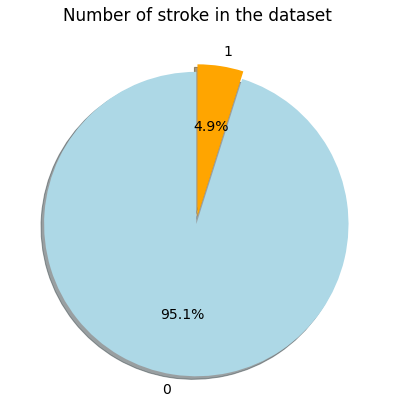

In [47]:
import matplotlib.pyplot as plt
labels =df['stroke'].value_counts(sort = True).index
sizes = df['stroke'].value_counts(sort = True)

colors = ["lightblue","orange"]
explode = (0.05,0) 
 
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.title('Number of stroke in the dataset')
plt.show()

Stroke data is highly unbalanced.

In [48]:
import pandas as pd
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [49]:
df.drop(df[df['gender'] == 'Other'].index, inplace = True)
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

"Other" category was removed as it has only one value. 

<function matplotlib.pyplot.show(close=None, block=None)>

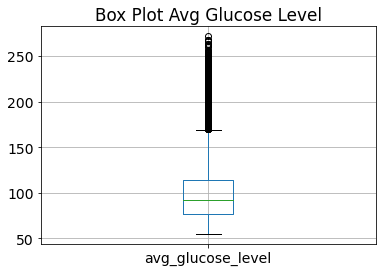

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

df.boxplot(column='avg_glucose_level')
plt.title('Box Plot Avg Glucose Level')
plt.show




In [51]:
df_G = df['avg_glucose_level']
Q1=df_G.quantile(.25)
Q3=df_G.quantile(.75)
IQR = Q3 -Q1
Lower_Limit = Q1 - 1.5 * IQR
Upper_Limit = Q3 + 1.5 * IQR

Outliers = df_G[ ((df_G < Lower_Limit)| ((df_G > Upper_Limit))) ]
print(len(Outliers),"Outliers")
print(len(df_G)-len(Outliers)," Without Outliers")

Percentage_Outliers = len(Outliers)/len(df_G)*100
print(Percentage_Outliers, " % Outliers")

627 Outliers
4482  Without Outliers
12.272460364063416  % Outliers


<function matplotlib.pyplot.show(close=None, block=None)>

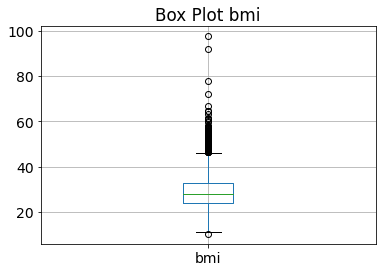

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

df.boxplot(column='bmi')
plt.title('Box Plot bmi')
plt.show

In [53]:
df_bmi = df['bmi']
Q1=df_bmi.quantile(.25)
Q3=df_bmi.quantile(.75)
IQR = Q3 -Q1
Lower_Limit = Q1 - 1.5 * IQR
Upper_Limit = Q3 + 1.5 * IQR
Outliers = df_bmi[ ((df_bmi < Lower_Limit)| ((df_bmi > Upper_Limit))) ]
print(len(Outliers),"Outliers")
print(len(df_bmi)-len(Outliers)," Without Outliers")

Percentage_Outliers = len(Outliers)/len(df_bmi)*100
print(Percentage_Outliers, " % Outliers")

126 Outliers
4983  Without Outliers
2.4662360540223136  % Outliers


,stroke
age,0.245239
hypertension,0.127891
heart_disease,0.134905
avg_glucose_level,0.131991
bmi,0.036075
stroke,1.000000


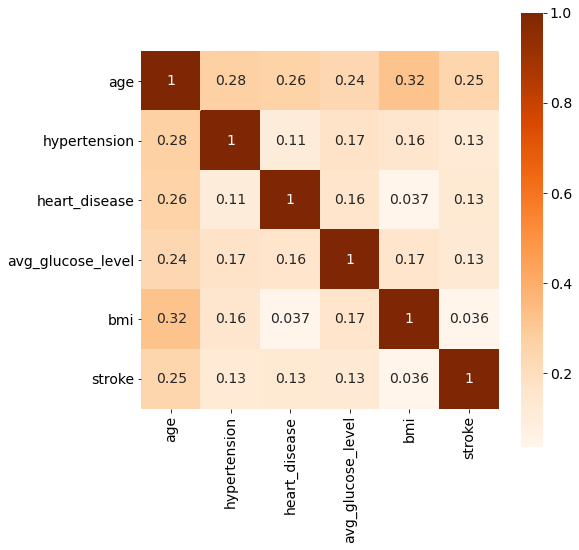

In [54]:
corr = pd.DataFrame(df.drop(['id'], axis = 1).corr())
fig=plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True, cmap="Oranges", square=True)
pd.DataFrame(corr.stroke)

In [55]:

correlated_df = df.corr()
correlated_df.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,-0.471299,-0.342702,-0.318546,-0.358271,-0.301083,-0.296700
age,-0.471299,1.000000,0.135524,0.106757,0.039464,0.260975,0.061467
hypertension,-0.342702,0.135524,1.000000,-0.158192,-0.029198,-0.017919,-0.112277
heart_disease,-0.318546,0.106757,-0.158192,1.000000,-0.039420,-0.293907,-0.054407
avg_glucose_level,-0.358271,0.039464,-0.029198,-0.039420,1.000000,-0.018928,-0.114293
bmi,-0.301083,0.260975,-0.017919,-0.293907,-0.018928,1.000000,-0.299980
stroke,-0.296700,0.061467,-0.112277,-0.054407,-0.114293,-0.299980,1.000000


There is not any strong correlations so we can use logistic regression.

<AxesSubplot:>

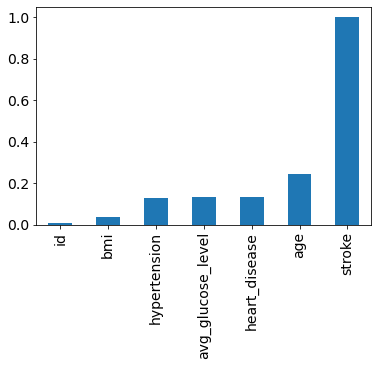

In [56]:
correlated_stroke =correlated_df["stroke"]
correlated_stroke.sort_values().plot(kind='bar')

In [57]:
df.drop(columns=['id']).groupby('stroke').mean()

,age,hypertension,heart_disease,avg_glucose_level,bmi
stroke,,,,,
0,41.974831,0.088889,0.047119,104.787584,28.800432
1,67.728193,0.265060,0.188755,132.544739,30.090361


In [58]:
df.drop(columns=['id']).groupby('heart_disease').mean()

,age,hypertension,avg_glucose_level,bmi,stroke
heart_disease,,,,,
0,41.804676,0.089799,104.388438,28.795448,0.041796
1,68.188406,0.231884,136.818768,30.051449,0.170290


In [59]:
df.drop(columns=['id']).groupby('hypertension').mean()

,age,heart_disease,avg_glucose_level,bmi,stroke
hypertension,,,,,
0,41.176318,0.045977,103.543088,28.462893,0.039688
1,62.244980,0.128514,130.188996,32.570683,0.132530


In [60]:
df.drop(columns=['id']).groupby('ever_married').mean()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
ever_married,,,,,,
No,22.011959,0.030182,0.018223,96.421452,25.301765,0.016515
Yes,54.342082,0.132717,0.072771,111.230310,30.728512,0.065613


In [61]:
df.drop(columns=['id']).groupby('gender').mean()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
gender,,,,,,
Female,43.757395,0.092184,0.037742,104.057809,29.034469,0.047094
Male,42.483385,0.104965,0.077069,109.088520,28.620993,0.051064


In [62]:
df.drop(columns=['id']).groupby('Residence_type').mean()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
Residence_type,,,,,,
Rural,42.907537,0.099881,0.053323,106.360529,28.866773,0.045364
Urban,43.542126,0.095146,0.054700,105.927307,28.859938,0.052003


In [63]:
df.drop(columns=['id']).groupby('smoking_status').mean()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
smoking_status,,,,,,
Unknown,30.229922,0.033679,0.031088,99.601541,25.762500,0.030440
formerly smoked,54.962670,0.135747,0.087104,112.851640,30.612896,0.079186
never smoked,46.744715,0.122622,0.047569,107.558092,29.942759,0.047569
smokes,47.096324,0.119138,0.077313,108.017440,30.382510,0.053232


In [64]:
df.drop(columns=['id']).groupby('work_type').mean()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
work_type,,,,,,
Govt_job,50.879756,0.111111,0.054795,107.779772,30.422527,0.050228
Never_worked,16.181818,0.000000,0.000000,96.042727,25.545455,0.000000
Private,45.510602,0.096101,0.054036,106.784350,30.221375,0.050958
Self-employed,60.201465,0.175824,0.098901,112.645446,30.098413,0.079365
children,6.841339,0.000000,0.001456,94.400277,20.225764,0.002911


In [65]:
cat_vars=['work_type','smoking_status','Residence_type', 'gender','ever_married']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var)
    data1=df.join(cat_list)
    df=data1
cat_vars=['work_type','smoking_status','Residence_type', 'gender','ever_married']
df_vars=df.columns.values.tolist()
to_keep=[i for i in df_vars if i not in cat_vars]

In [66]:
df_final=df[to_keep]
df_final.columns.values

array(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke', 'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed',
       'work_type_children', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'Residence_type_Rural',
       'Residence_type_Urban', 'gender_Female', 'gender_Male',
       'ever_married_No', 'ever_married_Yes'], dtype=object)

In [67]:
import pandas as pd
import numpy as np
#from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE


X = df_final.loc[:, df_final.columns != 'stroke']
y = df_final.loc[:, df_final.columns == 'stroke']

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['stroke'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no stroke in oversampled data",len(os_data_y[os_data_y['stroke']==0]))
print("Number of stroke",len(os_data_y[os_data_y['stroke']==1]))
print("Proportion of no stroke data in oversampled data is ",len(os_data_y[os_data_y['stroke']==0])/len(os_data_X))
print("Proportion of stroke data in oversampled data is ",len(os_data_y[os_data_y['stroke']==1])/len(os_data_X))

length of oversampled data is  6806
Number of no stroke in oversampled data 3403
Number of stroke 3403
Proportion of no stroke data in oversampled data is  0.5
Proportion of stroke data in oversampled data is  0.5


In [68]:
pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\users\wilda\anaconda3\lib\site-packages (0.8.0)
Note: you may need to restart the kernel to use updated packages.


In [69]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5109 non-null   int64  
 1   age                             5109 non-null   float64
 2   hypertension                    5109 non-null   int64  
 3   heart_disease                   5109 non-null   int64  
 4   avg_glucose_level               5109 non-null   float64
 5   bmi                             5109 non-null   float64
 6   stroke                          5109 non-null   int64  
 7   work_type_Govt_job              5109 non-null   uint8  
 8   work_type_Never_worked          5109 non-null   uint8  
 9   work_type_Private               5109 non-null   uint8  
 10  work_type_Self-employed         5109 non-null   uint8  
 11  work_type_children              5109 non-null   uint8  
 12  smoking_status_Unknown          51

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\wilda\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\wilda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [71]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.95


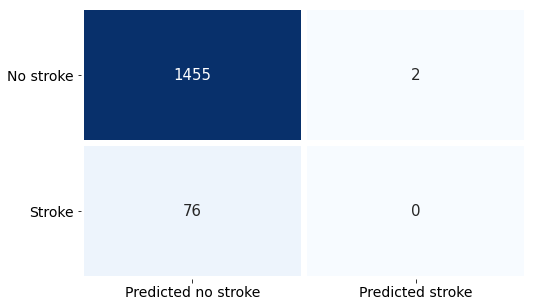

In [72]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8, 5))
sns.heatmap(confusion_matrix, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

In [73]:
df=pd.DataFrame({'odds_ratio':(np.exp(logreg.coef_).T).tolist(),'variable':X.columns.tolist()})
df['odds_ratio'] = df['odds_ratio'].str.get(0)

df=df.sort_values('odds_ratio', ascending=False)
df

,odds_ratio,variable
2,1.455046,hypertension
3,1.448190,heart_disease
12,1.091538,smoking_status_formerly smoked
1,1.050188,age
0,0.999991,id
4,0.993160,avg_glucose_level
7,0.991956,work_type_Never_worked
18,0.986815,gender_Male
14,0.924719,smoking_status_smokes
5,0.918088,bmi
